In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [69]:
# Method 2: Using pandas (recommended)
df = pd.read_csv('Jul23-AllAxesTest/X.csv', skiprows=[1])
# This reads the file with titles as column names, skipping the units row

# Get column names (titles)
column_titles = df.columns.tolist()

# Convert to numpy array
data_array = df.to_numpy()

# If you also want to store the units separately
df_with_units = pd.read_csv('Jul23-AllAxesTest/Y.csv', header=None)
units = df_with_units.iloc[1].tolist()  # Second row contains units
titles = df_with_units.iloc[0].tolist()  # First row contains titles

print("Column titles:", column_titles)
print("Data array shape:", data_array.shape)
print(data_array)

Column titles: ['Time', 'Channel A', 'Channel B', 'Channel C', 'Channel D']
Data array shape: (135181, 5)
[[-2.00100017e+00  3.93700800e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.00000017e+00  3.93700800e-02  1.18110200e-01  0.00000000e+00
   7.88939400e-02]
 [-1.99900017e+00  0.00000000e+00  3.93700800e-02  0.00000000e+00
  -3.93700800e-02]
 ...
 [ 1.33177006e+02  3.93700800e-02 -1.18110200e-01 -7.84325700e-02
  -7.88939400e-02]
 [ 1.33178006e+02 -3.93700800e-02  0.00000000e+00 -3.92162900e-02
  -7.88939400e-02]
 [ 1.33179006e+02  0.00000000e+00  0.00000000e+00  3.92162900e-02
  -3.93700800e-02]]


C:\Users\ChristosPC\AppData\Local\Temp\ipykernel_44800\3213632562.py:12: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_with_units = pd.read_csv('Jul23-AllAxesTest/Y.csv', header=None)


In [70]:
#skip first two rows (titles and units)
x_df= pd.read_csv('Jul23-AllAxesTest/X.csv', skiprows=[1])
y_df= pd.read_csv('Jul23-AllAxesTest/Y.csv', skiprows=[1])
z_df= pd.read_csv('Jul23-AllAxesTest/Z.csv', skiprows=[1])
e_df= pd.read_csv('Jul23-AllAxesTest/E.csv', skiprows=[1])

# the shape of the final csv files should be (N,5) where N is the number of samples
time= x_df.iloc[:,0].to_numpy()  #time column is the same for all files
sampling_rate= 1/(time[1]-time[0])
print("Sampling rate: ", sampling_rate)
#create arrays for each axis and channels
#X
x_chan_A = x_df.iloc[:,1].to_numpy()
x_chan_B = x_df.iloc[:,2].to_numpy()
x_chan_C = x_df.iloc[:,3].to_numpy()
x_chan_D = x_df.iloc[:,4].to_numpy()
#Y
y_chan_A = y_df.iloc[:,1].to_numpy()
y_chan_B = y_df.iloc[:,2].to_numpy()
y_chan_C = y_df.iloc[:,3].to_numpy()
y_chan_D = y_df.iloc[:,4].to_numpy()

#Z
z_chan_A = z_df.iloc[:,1].to_numpy()
z_chan_B = z_df.iloc[:,2].to_numpy()
z_chan_C = z_df.iloc[:,3].to_numpy()
z_chan_D = z_df.iloc[:,4].to_numpy()

#E
e_chan_A = e_df.iloc[:,1].to_numpy()
e_chan_B = e_df.iloc[:,2].to_numpy()
e_chan_C = e_df.iloc[:,3].to_numpy()
e_chan_D = e_df.iloc[:,4].to_numpy()


Sampling rate:  999.9999999996661


In [71]:
# Calculate sampling rate using all time points
time_differences = np.diff(time)  # Calculate differences between consecutive time points
average_time_step = np.mean(time_differences)  # Average time step
sampling_rate = 1 / average_time_step
sampling_rate = round(sampling_rate, 2)

print(f"Average time step: {average_time_step}")
print(f"Sampling rate: {sampling_rate} Hz")

Average time step: 0.0010000000474922324
Sampling rate: 1000.0 Hz


In [72]:
#Create a total list of channel arrays
total_channels = [x_chan_A, x_chan_B, x_chan_C, x_chan_D,
                  y_chan_A, y_chan_B, y_chan_C, y_chan_D,
                    z_chan_A, z_chan_B, z_chan_C, z_chan_D,
                    e_chan_A, e_chan_B, e_chan_C, e_chan_D]


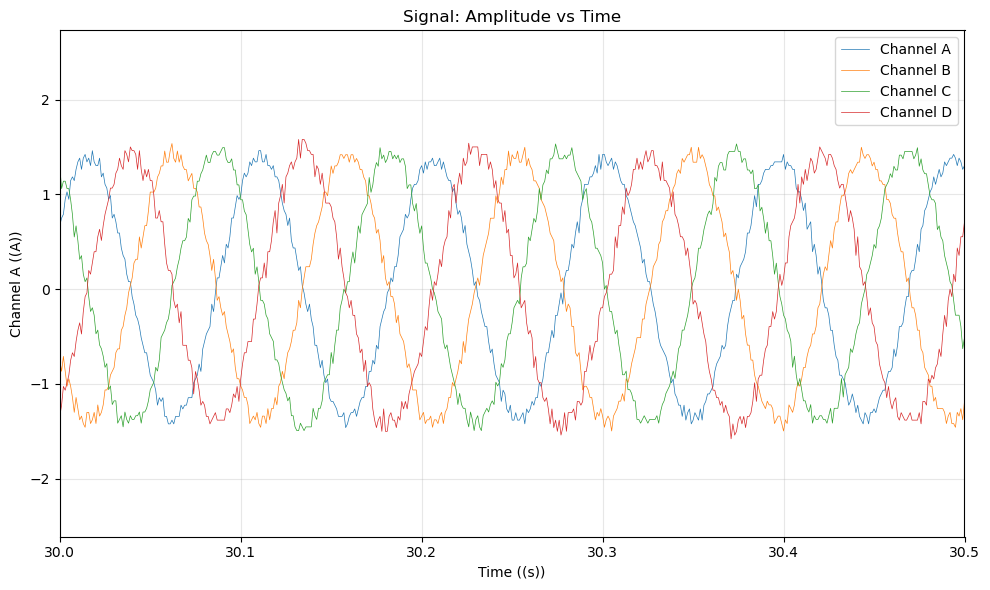

In [73]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time, total_channels[0], linewidth=0.5, label='Channel A')
plt.plot(time, total_channels[1], linewidth=0.5, label='Channel B')
plt.plot(time, total_channels[2], linewidth=0.5, label='Channel C')
plt.plot(time, total_channels[3], linewidth=0.5, label='Channel D')
plt.xlabel(f'{column_titles[0]} ({units[0]})')
plt.ylabel(f'{column_titles[1]} ({units[1]})')
plt.title('Signal: Amplitude vs Time')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(30,30.5)
plt.tight_layout()
plt.show()

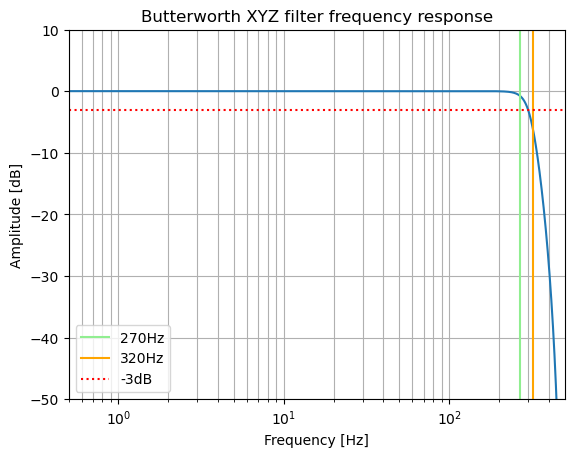

In [74]:
#Step 1: filtering of certain frequencies in the signals
#Creation of the butterworth filter
#Low pass filter for XYZ channels at 300 Hz
#low pass filter for E channel at 275 Hz
b_xyz, a_xyz=sp.signal.butter(4,300,btype='low',fs=sampling_rate)
b_e, a_e=sp.signal.butter(4,275,btype='low',fs=sampling_rate)

#Code for bode diagram of filter, from scipy documentation example
w, h = sp.signal.freqz(b_xyz, a_xyz, worN=1000, fs=sampling_rate)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth XYZ filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(270, color='lightgreen',label='270Hz')     # cutoff frequency high, line
plt.axvline(320, color='orange',label='320Hz')         # 320 Hz line
plt.axhline(-3,color='red',label='-3dB',linestyle=':') # -3dB line
plt.ylim(-50, 10)
plt.legend()
plt.show()


In [75]:
#filtering of the signals
filtered_channels = []
for i in range(len(total_channels)):
    if i < 12:  # XYZ channels
        filtered = sp.signal.lfilter(b_xyz, a_xyz, total_channels[i])
    else:  # E channel
        filtered = sp.signal.lfilter(b_e, a_e, total_channels[i])
    filtered_channels.append(filtered)


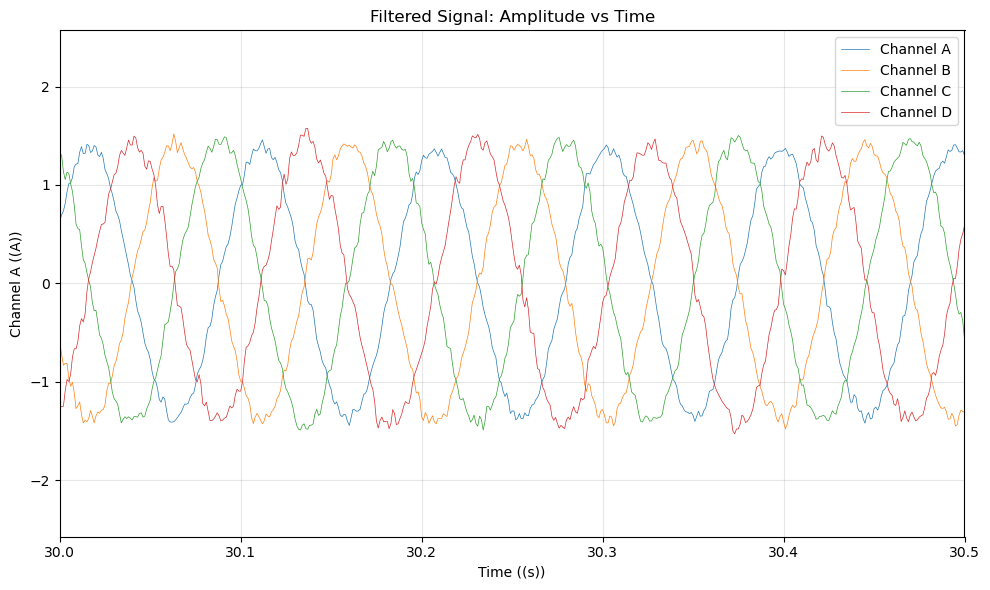

In [76]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(time, filtered_channels[0], linewidth=0.5, label='Channel A')
plt.plot(time, filtered_channels[1], linewidth=0.5, label='Channel B')
plt.plot(time, filtered_channels[2], linewidth=0.5, label='Channel C')
plt.plot(time, filtered_channels[3], linewidth=0.5, label='Channel D')
plt.xlabel(f'{column_titles[0]} ({units[0]})')
plt.ylabel(f'{column_titles[1]} ({units[1]})')
plt.title('Filtered Signal: Amplitude vs Time')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(30,30.5)
plt.tight_layout()
plt.show()

In [77]:
#Peak detection
total_peaks = []
for i in range(len(filtered_channels)):
    if i<4:
        temp_peaks, _ = sp.signal.find_peaks(filtered_channels[i], height=0.4, prominence=0.3)
    elif i<8:
        temp_peaks, _ = sp.signal.find_peaks(filtered_channels[i], height=0.4, prominence=0.3)
    elif i<12:
        temp_peaks, _ = sp.signal.find_peaks(filtered_channels[i], height=0.1, prominence=0.125)
    else:
        temp_peaks, _ = sp.signal.find_peaks(filtered_channels[i], height=0.1, prominence=0.2)
    total_peaks.append(temp_peaks)

In [78]:
print (len(total_peaks[0]))

1148


In [80]:
# Clearing peaks that are too close to each other
# Step 1: Validate and filter out-of-bounds peak indices
# Step 2: Handle same-timestamp conflicts (keep highest peak)
# Step 3: Handle proximity conflicts (remove lower peaks within threshold)

# Fixed time threshold (in seconds)
fixed_threshold = 0.025  # 25ms

# First, validate all peak indices
max_index = len(time) - 1
validated_peaks = []
for ch_peaks in total_peaks:
    # Filter out any indices that are out of bounds
    valid_peaks = ch_peaks[ch_peaks <= max_index]
    validated_peaks.append(valid_peaks)
    
print("Validation complete:")
for i, peaks in enumerate(validated_peaks):
    print(f"Channel {i}: {len(peaks)} valid peaks")

# Create a copy to work with
cleaned_peaks = [peaks.copy() for peaks in validated_peaks]

# Process each group of 4 channels (X, Y, Z, E axes)
for axis_start in range(0, len(cleaned_peaks), 4):
    # For each channel in this axis group
    for ch in range(axis_start, min(axis_start + 4, len(cleaned_peaks))):
        peaks_to_remove = []
        
        # For each peak in this channel
        for i, peak_idx in enumerate(cleaned_peaks[ch]):
            peak_time = time[peak_idx]
            peak_amplitude = filtered_channels[ch][peak_idx]
            
            # Check against peaks in other channels of the same axis
            for other_ch in range(axis_start, min(axis_start + 4, len(cleaned_peaks))):
                if other_ch == ch:
                    continue
                
                # Find nearest peak in other channel
                if len(cleaned_peaks[other_ch]) == 0:
                    continue
                
                other_peak_indices = cleaned_peaks[other_ch]
                other_peak_times = time[other_peak_indices]
                
                # Calculate time differences to all peaks in other channel
                time_diffs = np.abs(other_peak_times - peak_time)
                nearest_idx = np.argmin(time_diffs)
                nearest_time_diff = time_diffs[nearest_idx]
                nearest_peak_idx = other_peak_indices[nearest_idx]
                nearest_amplitude = filtered_channels[other_ch][nearest_peak_idx]
                
                # Calculate average period between nearby peaks (for adaptive threshold)
                if len(cleaned_peaks[ch]) > 3:
                    # Get 3 nearest peaks in current channel
                    current_times = time[cleaned_peaks[ch]]
                    time_to_peaks = np.abs(current_times - peak_time)
                    nearest_3 = np.argsort(time_to_peaks)[1:4]  # Exclude self (index 0)
                    if len(nearest_3) > 1:
                        periods = np.diff(np.sort(time[cleaned_peaks[ch][nearest_3]]))
                        avg_period = np.mean(periods)
                        adaptive_threshold = avg_period / 2
                    else:
                        adaptive_threshold = fixed_threshold
                else:
                    adaptive_threshold = fixed_threshold
                
                # Use the minimum of adaptive and fixed threshold
                threshold = min(adaptive_threshold, fixed_threshold)
                
                # Check if peaks are too close AND current peak is lower
                if nearest_time_diff < threshold and peak_amplitude < nearest_amplitude:
                    peaks_to_remove.append(i)
                    break  # No need to check other channels once marked for removal
        
        # Remove peaks (in reverse order to maintain indices)
        for idx in sorted(set(peaks_to_remove), reverse=True):
            cleaned_peaks[ch] = np.delete(cleaned_peaks[ch], idx)

# Update total_peaks with cleaned peaks
total_peaks = cleaned_peaks

print("\nPeak cleaning complete:")
for i, peaks in enumerate(total_peaks):
    print(f"Channel {i}: {len(peaks)} peaks remaining")

Validation complete:
Channel 0: 1148 valid peaks
Channel 1: 1149 valid peaks
Channel 2: 1149 valid peaks
Channel 3: 1150 valid peaks
Channel 4: 848 valid peaks
Channel 5: 838 valid peaks
Channel 6: 848 valid peaks
Channel 7: 838 valid peaks
Channel 8: 945 valid peaks
Channel 9: 882 valid peaks
Channel 10: 1096 valid peaks
Channel 11: 1808 valid peaks
Channel 12: 5188 valid peaks
Channel 13: 5189 valid peaks
Channel 14: 5189 valid peaks
Channel 15: 5189 valid peaks

Peak cleaning complete:
Channel 0: 446 peaks remaining
Channel 1: 547 peaks remaining
Channel 2: 918 peaks remaining
Channel 3: 910 peaks remaining
Channel 4: 462 peaks remaining
Channel 5: 526 peaks remaining
Channel 6: 541 peaks remaining
Channel 7: 490 peaks remaining
Channel 8: 392 peaks remaining
Channel 9: 427 peaks remaining
Channel 10: 634 peaks remaining
Channel 11: 1296 peaks remaining
Channel 12: 206 peaks remaining
Channel 13: 1706 peaks remaining
Channel 14: 2191 peaks remaining
Channel 15: 875 peaks remaining


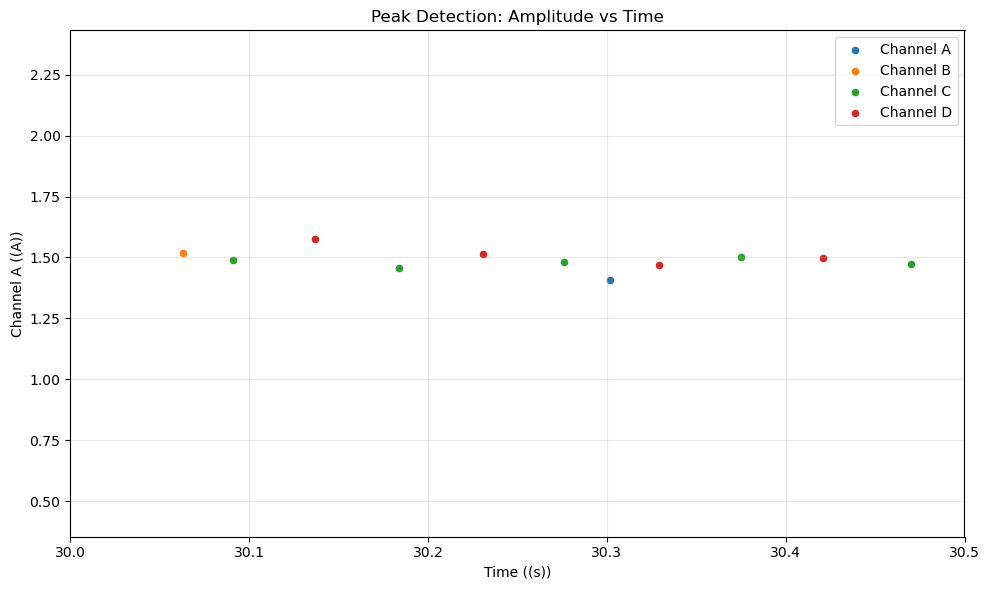

In [81]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(time[total_peaks[0]], filtered_channels[0][total_peaks[0]], s=20, label='Channel A')
plt.scatter(time[total_peaks[1]], filtered_channels[1][total_peaks[1]], s=20, label='Channel B')
plt.scatter(time[total_peaks[2]], filtered_channels[2][total_peaks[2]], s=20, label='Channel C')
plt.scatter(time[total_peaks[3]], filtered_channels[3][total_peaks[3]], s=20, label='Channel D')
plt.xlabel(f'{column_titles[0]} ({units[0]})')
plt.ylabel(f'{column_titles[1]} ({units[1]})')
plt.title('Peak Detection: Amplitude vs Time')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(30, 30.5)
plt.tight_layout()
plt.show()

In [82]:
# Determine firing order for each axis
# Process each group of 4 channels (X, Y, Z, E axes)
axis_names = ['X', 'Y', 'Z', 'E']
firing_orders = []

for axis_idx in range(4):
    # Get peaks for this axis (4 channels)
    axis_start = axis_idx * 4
    axis_peaks = total_peaks[axis_start:axis_start + 4]
    
    # Combine all peaks from the 4 channels with their channel identifiers
    all_peaks_with_channels = []
    for ch_idx in range(4):
        for peak_time_idx in axis_peaks[ch_idx]:
            all_peaks_with_channels.append((time[peak_time_idx], ch_idx))
    
    # Sort by time to get chronological firing order
    all_peaks_with_channels.sort(key=lambda x: x[0])
    
    # Extract just the channel indices (firing order)
    axisPeaks = [ch for _, ch in all_peaks_with_channels]
    
    # Initialize firing order buffer with first 4 peaks
    if len(axisPeaks) >= 4:
        FOBuffer = axisPeaks[0:4]
        predictionCount = 0
        nextPeakIndex = 4
        
        while predictionCount < 16 and nextPeakIndex < len(axisPeaks):
            predictionIndex = nextPeakIndex % 4
            
            if axisPeaks[nextPeakIndex] == FOBuffer[predictionIndex]:
                predictionCount += 1
            else:  # Capture new firing order buffer
                FOBuffer = axisPeaks[nextPeakIndex - 3:nextPeakIndex + 1]
                predictionCount = 0
            
            nextPeakIndex += 1
        
        firing_orders.append(FOBuffer)
        print(f"{axis_names[axis_idx]} axis firing order: {['A', 'B', 'C', 'D'][FOBuffer[0]]}, "
              f"{['A', 'B', 'C', 'D'][FOBuffer[1]]}, "
              f"{['A', 'B', 'C', 'D'][FOBuffer[2]]}, "
              f"{['A', 'B', 'C', 'D'][FOBuffer[3]]}")
    else:
        firing_orders.append(None)
        print(f"{axis_names[axis_idx]} axis: Not enough peaks to determine firing order")

print("\nFiring orders determined for all axes")

X axis firing order: A, D, B, C
Y axis firing order: D, B, C, A
Z axis firing order: D, A, C, B
E axis firing order: B, D, C, D

Firing orders determined for all axes


In [84]:
# Detect bad order sections (reversals and errors in firing order)
axis_names = ['X', 'Y', 'Z', 'E']
all_bad_sections = []

for axis_idx in range(4):
    # Get peaks for this axis (4 channels)
    axis_start = axis_idx * 4
    axis_peaks = total_peaks[axis_start:axis_start + 4]
    
    # Combine all peaks from the 4 channels with their channel identifiers
    all_peaks_with_channels = []
    for ch_idx in range(4):
        for peak_time_idx in axis_peaks[ch_idx]:
            all_peaks_with_channels.append((time[peak_time_idx], ch_idx, peak_time_idx))
    
    # Sort by time to get chronological firing order
    all_peaks_with_channels.sort(key=lambda x: x[0])
    
    # Extract channel indices (firing order) and time indices
    axisPeaks = [ch for _, ch, _ in all_peaks_with_channels]
    peak_indices = [idx for _, _, idx in all_peaks_with_channels]
    peak_times = [t for t, _, _ in all_peaks_with_channels]
    
    if len(axisPeaks) < 4:
        print(f"{axis_names[axis_idx]} axis: Not enough peaks")
        continue
    
    # Get the firing order buffer (from previous code)
    FOBuffer = firing_orders[axis_idx] if firing_orders[axis_idx] is not None else axisPeaks[0:4]
    originalFOBuffer = FOBuffer.copy()
    
    # Helper functions
    def predictForward(buffer, index):
        """Predict next peak based on current firing order"""
        return buffer[index % 4]
    
    def predictReversal(buffer, index):
        """Predict next peak if firing order is reversed"""
        reversed_buffer = buffer[::-1]
        return reversed_buffer[index % 4]
    
    def reverseBuffer(buffer):
        """Reverse the firing order buffer"""
        return buffer[::-1]
    
    def isAdjacent(phase1, phase2, buffer):
        """Check if two phases are adjacent in the firing order"""
        idx1 = buffer.index(phase1) if phase1 in buffer else -1
        idx2 = buffer.index(phase2) if phase2 in buffer else -1
        if idx1 == -1 or idx2 == -1:
            return False
        # Adjacent means difference of 1 or 3 (wrapping around)
        diff = abs(idx1 - idx2)
        return diff == 1 or diff == 3
    
    # Initialize tracking variables
    badOrderSections = []
    badSection = None
    goodPeaksCounter = 0
    goodPeaksNeeded = 4  # Four consecutive valid peaks to close bad section
    peakIndex = 1  # Start from second peak (compare to first)
    mustReverse = False
    currentBuffer = FOBuffer.copy()
    
    while peakIndex < len(axisPeaks):
        currentPeak = axisPeaks[peakIndex]
        previousPeak = axisPeaks[peakIndex - 1]
        
        # Check if current and previous peaks are adjacent
        if not isAdjacent(currentPeak, previousPeak, currentBuffer):
            # Non-adjacent peaks - invalid firing order
            if badSection is None:
                # Start of a new bad section
                badSection = {
                    'axis': axis_names[axis_idx],
                    'start_index': peakIndex - 1,
                    'start_time': peak_times[peakIndex - 1],
                    'original_buffer': originalFOBuffer.copy(),
                    'must_reverse': False,
                    'type': 'error'
                }
            
            # Reset good peaks counter
            goodPeaksCounter = 0
            
            # Circularly shift buffer so current peak is at start
            # This helps detect new firing order pattern
            if peakIndex + 3 < len(axisPeaks):
                # Try to capture new firing order from current position
                tempBuffer = axisPeaks[peakIndex:peakIndex + 4]
                # Check if this forms a valid firing order pattern
                if len(set(tempBuffer)) == 4:  # All different phases
                    currentBuffer = tempBuffer
        
        else:
            # Adjacent peaks - check if forward or reverse
            forwardPrediction = predictForward(currentBuffer, peakIndex)
            reversePrediction = predictReversal(currentBuffer, peakIndex)
            
            if currentPeak == forwardPrediction:
                # Valid forward motion
                if badSection is not None:
                    goodPeaksCounter += 1
            
            elif currentPeak == reversePrediction:
                # Valid reverse motion
                currentBuffer = reverseBuffer(currentBuffer)
                
                if badSection is None:
                    # Start of reversal section
                    badSection = {
                        'axis': axis_names[axis_idx],
                        'start_index': peakIndex,
                        'start_time': peak_times[peakIndex],
                        'original_buffer': originalFOBuffer.copy(),
                        'must_reverse': False,
                        'type': 'reversal'
                    }
                else:
                    # Toggle reverse flag
                    mustReverse = not mustReverse
                    badSection['must_reverse'] = mustReverse
                
                if badSection is not None:
                    goodPeaksCounter += 1
            
            # Check if we have enough good peaks to close bad section
            if badSection is not None and goodPeaksCounter >= goodPeaksNeeded:
                # Close out bad section
                endBound = peakIndex - goodPeaksNeeded
                badSection['end_index'] = endBound
                badSection['end_time'] = peak_times[endBound]
                badOrderSections.append(badSection)
                badSection = None
                goodPeaksCounter = 0
                mustReverse = False
                currentBuffer = FOBuffer.copy()
        
        peakIndex += 1
    
    # Handle case where bad section extends to end of data
    if badSection is not None:
        badSection['end_index'] = len(axisPeaks) - 1
        badSection['end_time'] = peak_times[-1]
        badOrderSections.append(badSection)
    
    # Store bad sections for this axis
    all_bad_sections.extend(badOrderSections)
    
    # Print results
    if len(badOrderSections) > 0:
        print(f"\n{axis_names[axis_idx]} axis: Found {len(badOrderSections)} bad sections:")
        for i, section in enumerate(badOrderSections):
            print(f"  Section {i+1}: {section['type']} from t={section['start_time']:.3f}s to t={section.get('end_time', 'end'):.3f}s")
            if section.get('must_reverse'):
                print(f"    Must reverse firing order")
    else:
        print(f"\n{axis_names[axis_idx]} axis: No bad sections found")

print(f"\nTotal bad sections across all axes: {len(all_bad_sections)}")


X axis: Found 104 bad sections:
  Section 1: reversal from t=0.041s to t=0.103s
  Section 2: reversal from t=0.282s to t=0.342s
  Section 3: reversal from t=0.522s to t=0.729s
    Must reverse firing order
  Section 4: error from t=1.024s to t=2.151s
  Section 5: reversal from t=2.301s to t=2.364s
  Section 6: reversal from t=2.543s to t=2.604s
  Section 7: reversal from t=2.784s to t=3.104s
    Must reverse firing order
  Section 8: error from t=3.437s to t=3.612s
    Must reverse firing order
  Section 9: reversal from t=3.765s to t=3.824s
  Section 10: reversal from t=4.002s to t=4.713s
  Section 11: error from t=4.839s to t=5.010s
  Section 12: reversal from t=5.162s to t=5.430s
    Must reverse firing order
  Section 13: reversal from t=5.607s to t=5.665s
  Section 14: reversal from t=5.844s to t=6.055s
    Must reverse firing order
  Section 15: error from t=6.648s to t=6.795s
    Must reverse firing order
  Section 16: reversal from t=6.944s to t=7.870s
  Section 17: error from